# Frequently Used Data

### data format

In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import requests
from matplotlib.font_manager import fontManager
from collections import Counter

path = "../datasets.jsonl"
font_path = "../TaipeiSansTCBeta-Regular.ttf"

fontManager.addfont(font_path)
mpl.rc('font', family='Taipei Sans TC Beta')

o_dataset = []
with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)
print(o_dataset[:2])

o_topic = []
path = "../topics.jsonl"

with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_topic.append(data)
print(o_topic[0])

o_project = []
path = "../projects.jsonl"

with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_project.append(data)
print(o_project[0])

[{'author': '施君翰、高偉傑', 'author_email': None, 'contact_email': '', 'contact_person': '', 'creator_user_id': 'b274036a-23b4-4097-b4f5-884a367d8807', 'data_type': ['doc'], 'groups': [], 'id': 'e67bc7e2-7fc2-4d41-a994-064954e164bf', 'isopen': False, 'keywords': [], 'language': [], 'license_id': 'notspecified', 'license_title': 'License Not Specified', 'maintainer': None, 'maintainer_email': None, 'metadata_created': '2023-03-14T09:44:11.573993', 'metadata_modified': '2023-08-19T14:12:45.867569', 'name': 'e8d91', 'notes': '藤寮坑溝第二期生態檢核 (施工前)', 'num_resources': 3, 'num_tags': 0, 'organization': None, 'private': False, 'process_step': '', 'relationships_as_object': [], 'relationships_as_subject': [], 'remarks': '', 'resources': [{'cache_last_updated': None, 'cache_url': None, 'created': '2023-03-14T09:46:25.010188', 'datastore_active': False, 'datastore_contains_all_records_of_source_file': False, 'description': '藤寮二期12月生態檢核報告 (施工前)', 'format': 'PDF', 'hash': '', 'id': '0811f716-6ee6-488f-a81d

## Largest author


[('高雄市政府水利局、科進栢誠工程顧問股份有限公司', 117), ('中央研究院人社中心GIS專題中心：台灣歷史文化地圖', 116), ('嘉義縣政府', 99), ('6456', 95), ('逢甲大學水利發展中心', 77), ('6458', 63), ('逢甲大學', 44), ('磐誠工程顧問股份有限公司', 44), ('samson', 37), ('Linda Chang', 37)]


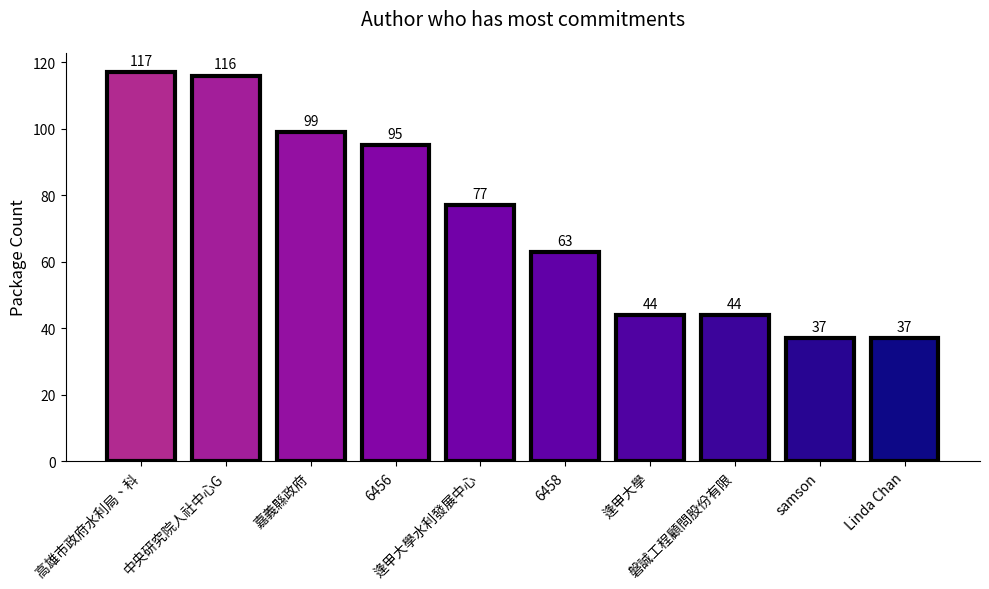

In [2]:
author = []
for i in o_dataset[:-1]: # 最後一個沒有作者
  author.append(i['author'])
author_counts = Counter(author)

top_authors = author_counts.most_common(10)
print(top_authors)
top_authors_names = [i[0][:10] for i in top_authors]
top_authors_mentions = [i[1] for i in top_authors]


plt.figure(figsize=(10, 6))  # Adjust the figure size
ax = plt.gca()
colors = plt.cm.plasma(np.linspace(0.4, 0, len(top_authors_names)))
# Create the bar plot
bars = plt.bar(top_authors_names, top_authors_mentions, color=colors, edgecolor='black', linewidth=3)


# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)  # Adjust label position and fontsize

plt.ylabel('Package Count', fontsize=12)
plt.title('Author who has most commitments', fontsize=14, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust fontsize of x tick labels
plt.yticks(fontsize=10)  # Adjust fontsize of y tick labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
# 可以再做一個比例圓餅圖
## 得知現在的作者有誰

## Largest project
<p></p>


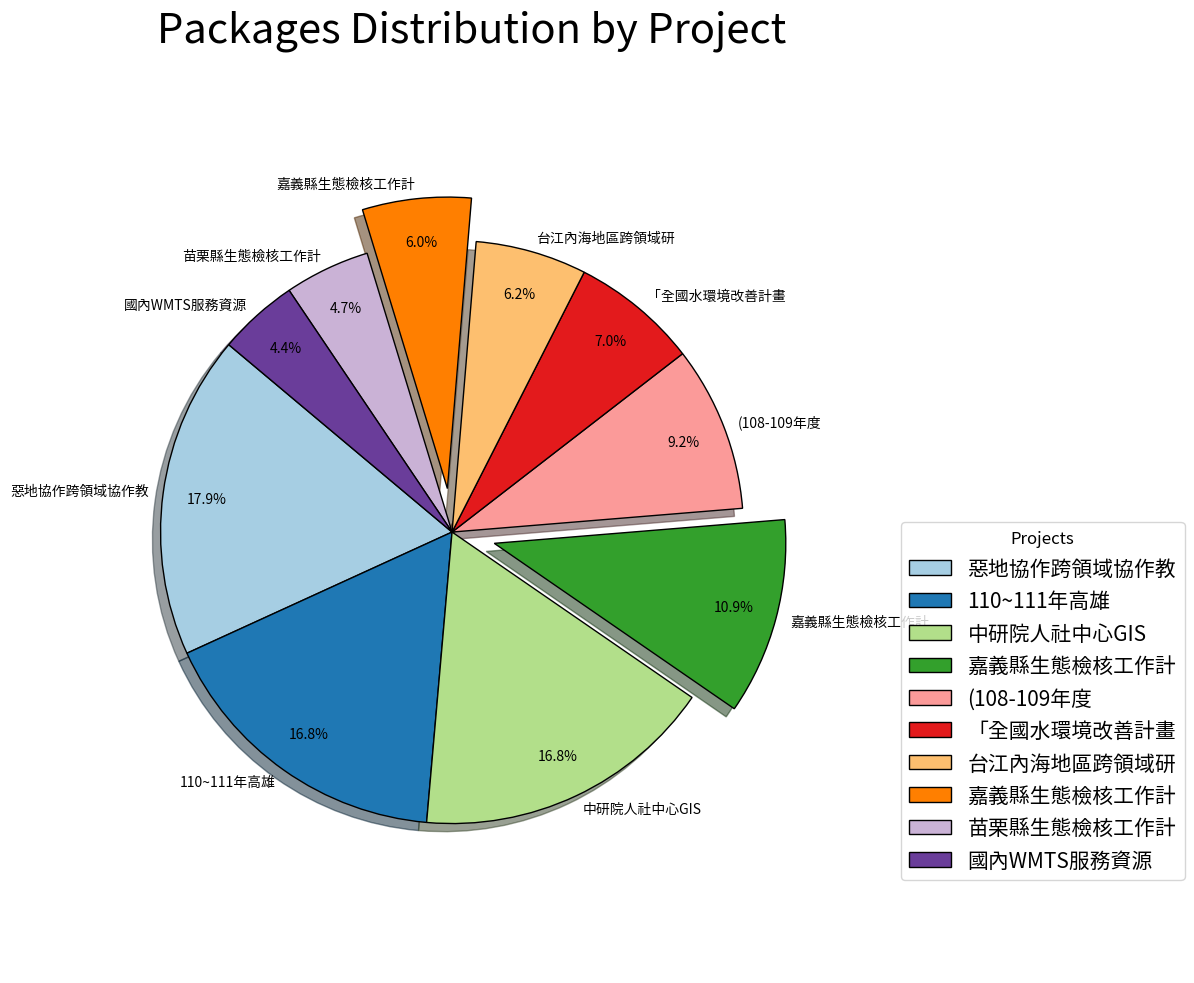

In [3]:
count_pro = 0
top_project = []

for i in o_project:
  count_pro += 1
  top_project.append({'display_name':i['display_name'],'packages':i['package_count']})

sort_project = sorted(top_project,key=lambda x:x['packages'],reverse=True)
pro_values = [i['packages']for i in sort_project[:10]]
pro_labels = [i['display_name'][:10] for i in sort_project[:10]]


colors = plt.cm.Paired(range(len(data)))

# Explode a specific slice
explode = [0.15 if name.startswith('嘉義縣') else 0 for name in pro_labels]

plt.figure(figsize=(12, 10))
plt.pie(
    pro_values,
    labels=pro_labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,  # Explode a slice for emphasis
    shadow=True,      # Add shadow to the chart
    wedgeprops={'edgecolor': 'black'},  # Add black edge to each slice
    pctdistance=0.85,  # Distance of the percentage labels from the center
    labeldistance=1.05,  # Distance of the slice labels from the center
)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Packages Distribution by Project', fontsize=30)
plt.rcParams['font.size'] = 12
# Adding a legend with custom colors and display names
plt.legend(
    loc='upper left',
    labels=pro_labels,
    bbox_to_anchor=(1, 0.5),
    prop={'size': 15},
    title="Projects"
)

plt.tight_layout()
plt.show()

## Largest tags

<p>秀出被使用最多次的tag還有使用次數</p>

[{208, '生態檢核'}, {'高雄市', 142}, {'playaround workshop', 38}, {'UAV', 36}, {'台江國家公園', 35}, {33, 'UAS'}, {'前瞻水環境建設', 29}, {'論文', 25}, {24, '水與安全計畫'}, {21, 'LTSER'}]


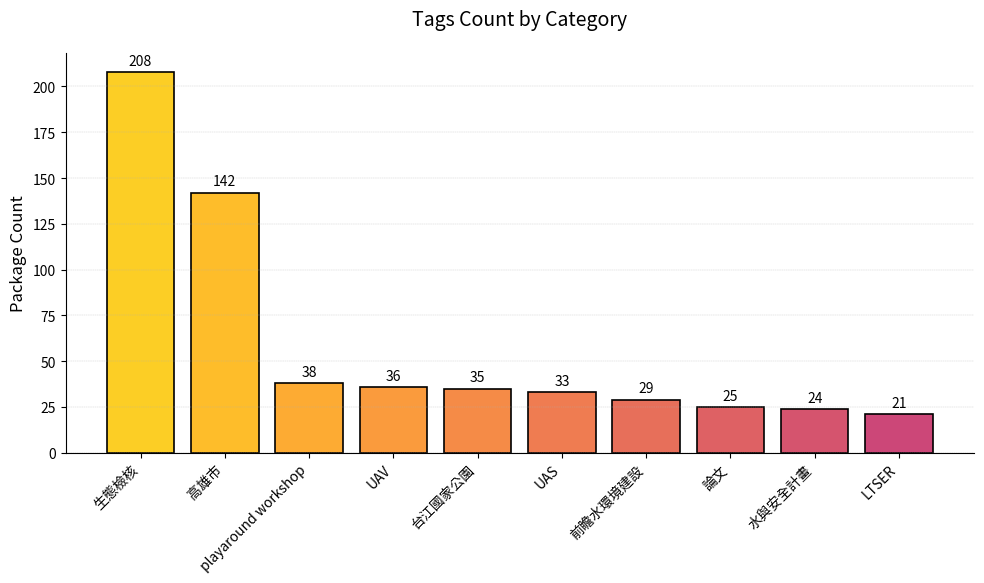

In [4]:
url = "http://data.depositar.io/api/3/action/package_search?facet.field=[%22tags%22]&facet.limit=10"
package_list = requests.get(url).json()

tag_number =  package_list['result']['facets']['tags']
tag_list = [{key,value} for key, value in tag_number.items()]
values = tag_number.values()
labels = tag_number.keys()
print(tag_list)
# plt.bar(labels, values)
# plt.xlabel('Categories')
# plt.ylabel('Package Count')
# plt.title('Bar Graph: Package Count by Category')
# plt.xticks(rotation=45, ha='right')  # To rotate the labels for better readability
# plt.tight_layout()  # To prevent label cutoff
# plt.show()
plt.figure(figsize=(10, 6))  # Adjust the figure size
ax = plt.gca()
colors = plt.cm.plasma(np.linspace(0.9, 0.5, len(labels)))
# Create the bar plot
bars = plt.bar(labels, values, color=colors, edgecolor='black', linewidth=1.2)


# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)  # Adjust label position and fontsize
plt.ylabel('Package Count', fontsize=12)
plt.title('Tags Count by Category', fontsize=14, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust fontsize of x tick labels
plt.yticks(fontsize=10)  # Adjust fontsize of y tick labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a grid for better readability
ax.yaxis.grid(True, linestyle='--', linewidth=0.3, alpha=0.7)

plt.tight_layout()
plt.show()

## Largest topic
<br>#include tags也做得到
<br>#Returning a list of packages is too expensive, 要顯現出該topic有什麼資料集是做不到的事情

[{'name': 'thcts', 'package_count': 115}, {'name': 'geography-and-places', 'package_count': 64}, {'name': 'natural-and-physical-sciences', 'package_count': 57}, {'name': 'society-and-social-sciences', 'package_count': 54}, {'name': 'eco-check', 'package_count': 51}, {'name': 'society', 'package_count': 45}, {'name': 'uas-observation', 'package_count': 40}, {'name': 'biota', 'package_count': 32}, {'name': 'oceans', 'package_count': 24}, {'name': 'farming', 'package_count': 18}, {'name': 'general-reference', 'package_count': 15}, {'name': 'culture-and-the-arts', 'package_count': 12}, {'name': 'economy', 'package_count': 12}, {'name': 'climatology-meteorology-atmosphere', 'package_count': 11}, {'name': 'human-activities', 'package_count': 10}, {'name': 'geoscientific-information', 'package_count': 10}, {'name': 'environment', 'package_count': 10}, {'name': 'religion-and-belief-systems', 'package_count': 9}, {'name': '14-climate-change', 'package_count': 9}, {'name': 'asian-soundscape-moni

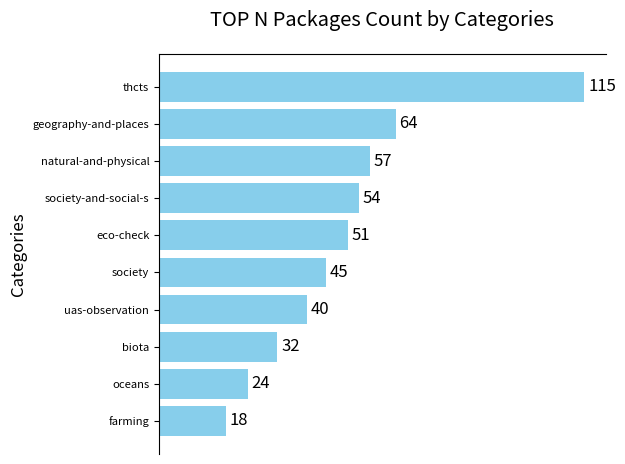

In [5]:

unsort_topic = []
for i in o_topic:
  unsort_topic.append({'name': i['name'], 'package_count': i['package_count']})

topic = sorted(unsort_topic, key=lambda x: x['package_count'],reverse=True)
values = [item['package_count'] for item in topic[:10]]
labels = [item['name'][:20] for item in topic[:10]]
print(topic)

# plt.bar(labels, values)
# plt.xlabel('Categories')
# plt.ylabel('Package Count')
# plt.title('Bar Graph: Package Count by Category')
# plt.xticks(rotation=45, ha='right')  # To rotate the labels for better readability
# plt.tight_layout()  # To prevent label cutoff
# plt.show()

plt.barh(labels, values, color='skyblue')  # Use barh for horizontal bars
plt.ylabel('Categories')
plt.title('TOP N Packages Count by Categories',pad=20)

# Reverse the y-axis for better presentation (optional)
plt.gca().invert_yaxis()

# Add data labels on the bars
for index, value in enumerate(values):
    plt.text(value + 1, index, str(value), va='center')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(fontsize=8)
# Remove ticks
plt.tick_params( bottom=False, labelbottom=False)
plt.tight_layout()
plt.show()



## Largest type
<br> problem of undefined needs to be solved <br>

[('PDF', 1086), ('SHP', 131), ('undefined', 121), ('CSV', 101), ('JPEG', 99), ('HTML', 51), ('KML', 39), ('WMTS', 33), ('PNG', 15), ('KMZ', 14), ('XLSX', 12), ('lost', 11), ('DOC', 9), ('XML', 9), ('ZIP', 7), ('DOCX', 7), ('TIFF', 7), ('.PDF', 6), ('ODS', 6), ('geotif', 6), ('TIF', 6), ('.xlsx', 5), ('RAR', 5), ('external resources', 5), ('audio/x-wav', 5), ('PPTX', 4), ('application/vnd.rar', 3), ('.docx', 3), ('mat', 3), ('XLS', 3), ('TXT', 3), ('dBase', 3), ('CPG', 3), ('image/heic', 2), ('.jpg', 2), ('QGIS', 2), ('PPT', 2), ('ipynb', 1), ('warc', 1), ('python', 1), ('tif', 1), ('.zip', 1), ('website', 1), ('application/x-7z-compressed', 1), ('WARC', 1), ('ODT', 1), ('gtm', 1), ('GIF', 1), ('RAW', 1), ('GZ', 1), ('JSON', 1), ('WAV', 1), ('WMS', 1), ('geotiff', 1), ('ECW', 1)]


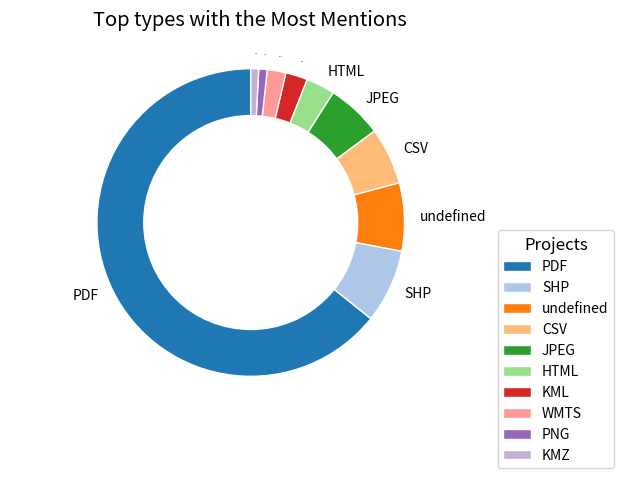

In [6]:
types = []

for j in o_dataset:
  if j['resources']:
      if j['resources'][0]['format']=='':
        types.append('undefined')
      elif j['resources'][0]['format']==".pdf":
        types.append('PDF')
      else:
        types.append(j['resources'][0]['format'])
  else:
      types.append('lost')

type_counts = Counter(types)
all_top_type = type_counts.most_common(120)
top_type = type_counts.most_common(10)

print(all_top_type)
all_top_type_mentions = [i[1] for i in all_top_type]

colors = plt.cm.tab20.colors
top_name = [i[0] for i in top_type]
top_type_mentions = [i[1] for i in top_type]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(top_type_mentions, labels=top_name, startangle=90,
                                   wedgeprops=dict(width=0.4, edgecolor='w'),
                                   autopct= '',  # Customize autopct
                                   pctdistance=0.85, colors=colors)  # Set pctdistance for percent labels

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a circle in the center to create a doughnut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Adding annotation labels outside the pie chart
for index,text in enumerate(texts):
    text.set_fontsize(10) if index<6 else text.set_fontsize(0)

for index,autotext in enumerate(autotexts):
    autotext.set_text('') if index>5 else None
plt.legend(
    loc='upper left',
    labels=top_name,
    bbox_to_anchor=(1, 0.5),
    prop={'size': 10},
    title="Projects"
)

plt.title('Top types with the Most Mentions',pad=20)

plt.tight_layout()
plt.show()